In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimpy import clean_columns, skim
import seaborn as sns

In [45]:
df = pd.read_csv('../data/raw_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


__Clean Column Names__

In [46]:
df = clean_columns(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             614 non-null    object 
 1   gender              601 non-null    object 
 2   married             611 non-null    object 
 3   dependents          599 non-null    object 
 4   education           614 non-null    object 
 5   self_employed       582 non-null    object 
 6   applicant_income    614 non-null    int64  
 7   coapplicant_income  614 non-null    float64
 8   loan_amount         592 non-null    float64
 9   loan_amount_term    600 non-null    float64
 10  credit_history      564 non-null    float64
 11  property_area       614 non-null    object 
 12  loan_status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [47]:
def print_unique_column_values(df):
    print("Unique Column Values")
    print('='*25)
    for line in [f'{col:<20} {(len(df[col].unique())) - (1 if df[col].isnull().sum() > 0 else 0)}' for col in df.columns]:
        print(line)

print_unique_column_values(df)

Unique Column Values
loan_id              614
gender               2
married              2
dependents           4
education            2
self_employed        2
applicant_income     505
coapplicant_income   287
loan_amount          203
loan_amount_term     10
credit_history       2
property_area        3
loan_status          2


__Convert Columns To Correct DataTypes__\
We want to keep our numeric data numeric, and ensure that out categorical, ordinal, and boolean values are objects.\
__Examining the head and information of our data we can assume:__
- [x] `loan_id`: Unique String (Index).
- [x] `gender`: Category [2].
- [x] `married`: Boolean.
- [x] `dependents`: Category [4].
- [x] `education`: Category [2].
- [x] `self_employed`: Boolean.
- [x] `applicant_income`: Numeric.
- [x] `coapplicant_income`: Numeric.
- [x] `loan_amount`: Numeric.
- [x] `loan_amount_term`: Numeric.
- [ ] `credit_history`: Boolean. (Currently is Float)
- [x] `property_area`: Category [3].
- [x] `loan_status`: Boolean.


In [48]:
df.credit_history = df.credit_history.astype(str)
df.credit_history.dtype.name

'object'

- [x] `credit_history`: Boolean.

## Categorical Data Overview

In [49]:
df.credit_history = df.credit_history.astype(str)

df_categorical = df.drop(columns=['loan_id']).select_dtypes(include=['object', 'boolean'])
skim(df_categorical)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 8      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ gender                        │     13 │       2.12 │                        0.98 │                    601 │  │
│ │ married                       │      3 │       0.49 │                           1 │                    611 │  │
│ │ dependents                    │     15 │       2.44 │                        0.98 │                    599 │  │
│ │ education                     │      0 │          0 │                         1.2 │                    748 │  │
│ │ self_employed                 │     32 │       5.21 │                        0.95 │                    582 │  │
│ │ credit_history                │      0 │          0 │                           1 │                    614 │  │
│ │ property_area                 │      0 │          0 │                           1 │                    614 │  │
│ │ loan_status                   │      0 │          0 │                           1 │                    614 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [50]:
print_unique_column_values(df_categorical)

Unique Column Values
gender               2
married              2
dependents           4
education            2
self_employed        2
credit_history       3
property_area        3
loan_status          2


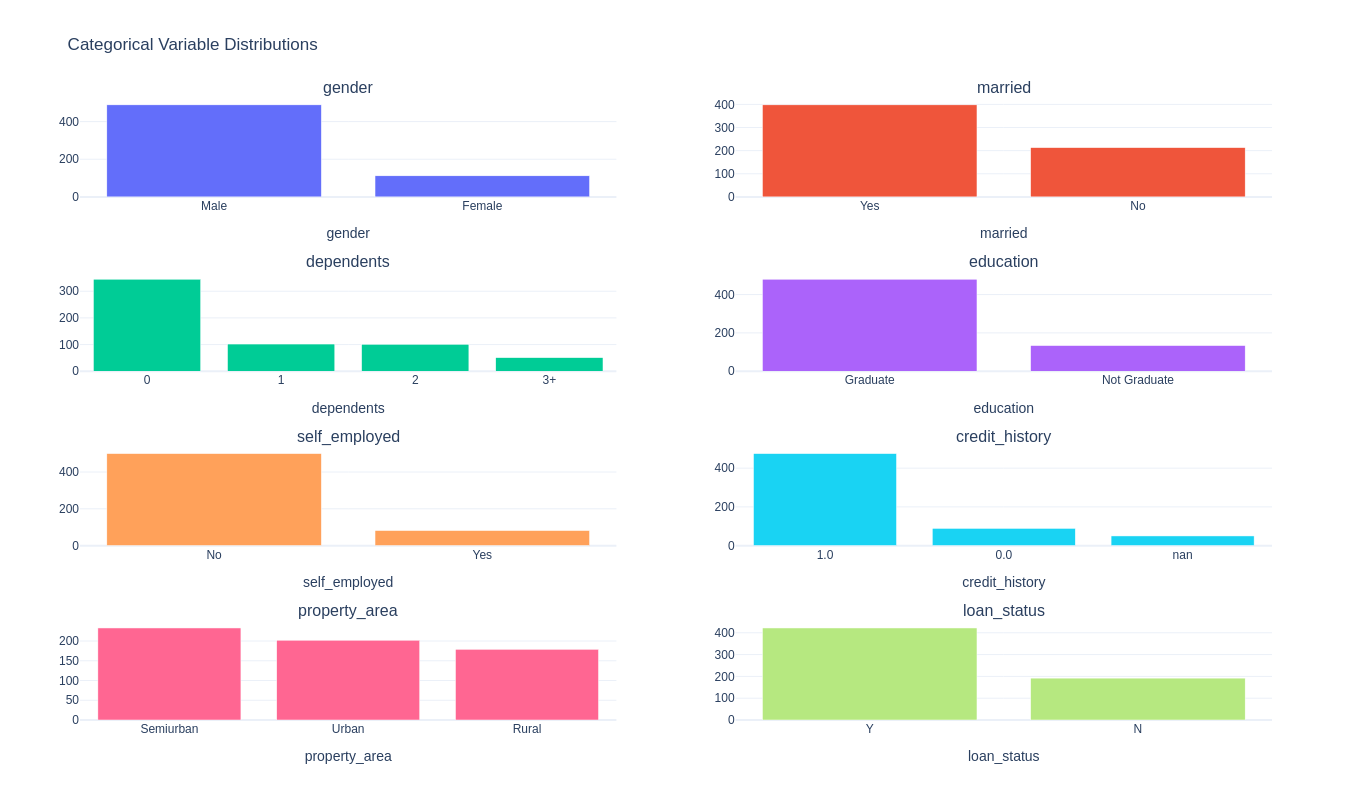

In [51]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

num_cols = 2
num_rows = (len(df_categorical.columns) + num_cols - 1) // num_cols

fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=df_categorical.columns)

for i, column in enumerate(df_categorical.columns):
    row = i // num_cols + 1
    col = i % num_cols + 1
    counts = df_categorical[column].value_counts()
    trace = go.Bar(x=counts.index, y=counts.values, name=column, )
    fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    title='Categorical Variable Distributions',
    height=800,
    showlegend=False,
    template='plotly_white'
)

for i, column in enumerate(df_categorical.columns):
    fig.update_xaxes(title_text=column, row=i // num_cols + 1, col=i % num_cols + 1)

fig.show()


### Numerical Data Overview

In [52]:
df_numeric = df.drop(columns=['loan_id']).select_dtypes(exclude=['object', 'boolean'])
print(skim(df_numeric))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 4      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ applicant_income        │   0 │      0 │   5400 │   6100 │  150 │  2900 │  3800 │  5800 │  81000 │    ▇    │  │
│ │ coapplicant_income      │   0 │      0 │   1600 │   2900 │    0 │     0 │  1200 │  2300 │  42000 │    ▇    │  │
│ │ loan_amount             │  22 │   3.58 │    150 │     86 │    9 │   100 │   130 │   170 │    700 │   ▇▇▁   │  │
│ │ loan_amount_term        │  14 │   2.28 │    340 │     65 │   12 │   360 │   360 │   360 │    480 │    ▁ ▇  │  │
│ └─────────────────────────┴─────┴────────┴────────┴────────┴──────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

None


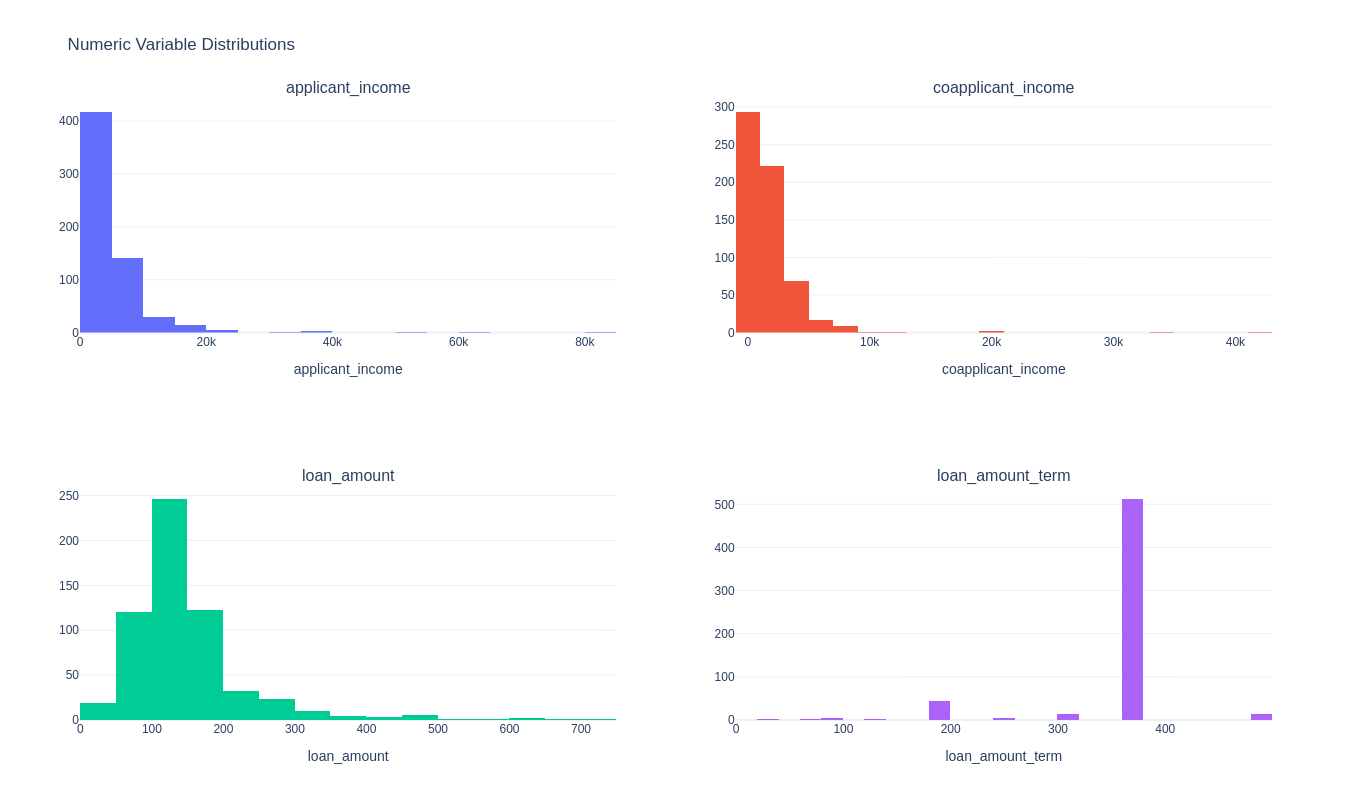

In [53]:
num_cols = 2
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=df_numeric.columns)

for i, column in enumerate(df_numeric.columns):
    row = i // num_cols + 1
    col = i % num_cols + 1
    fig.add_trace(
        go.Histogram(x=df_numeric[column], nbinsx=30, name=column),
        row=row, col=col
    )
    fig.update_xaxes(title_text=column, row=row, col=col)
    
fig.update_layout(
    title='Numeric Variable Distributions',
    height=800,
    showlegend=False,
    template='plotly_white'
)

fig.show()


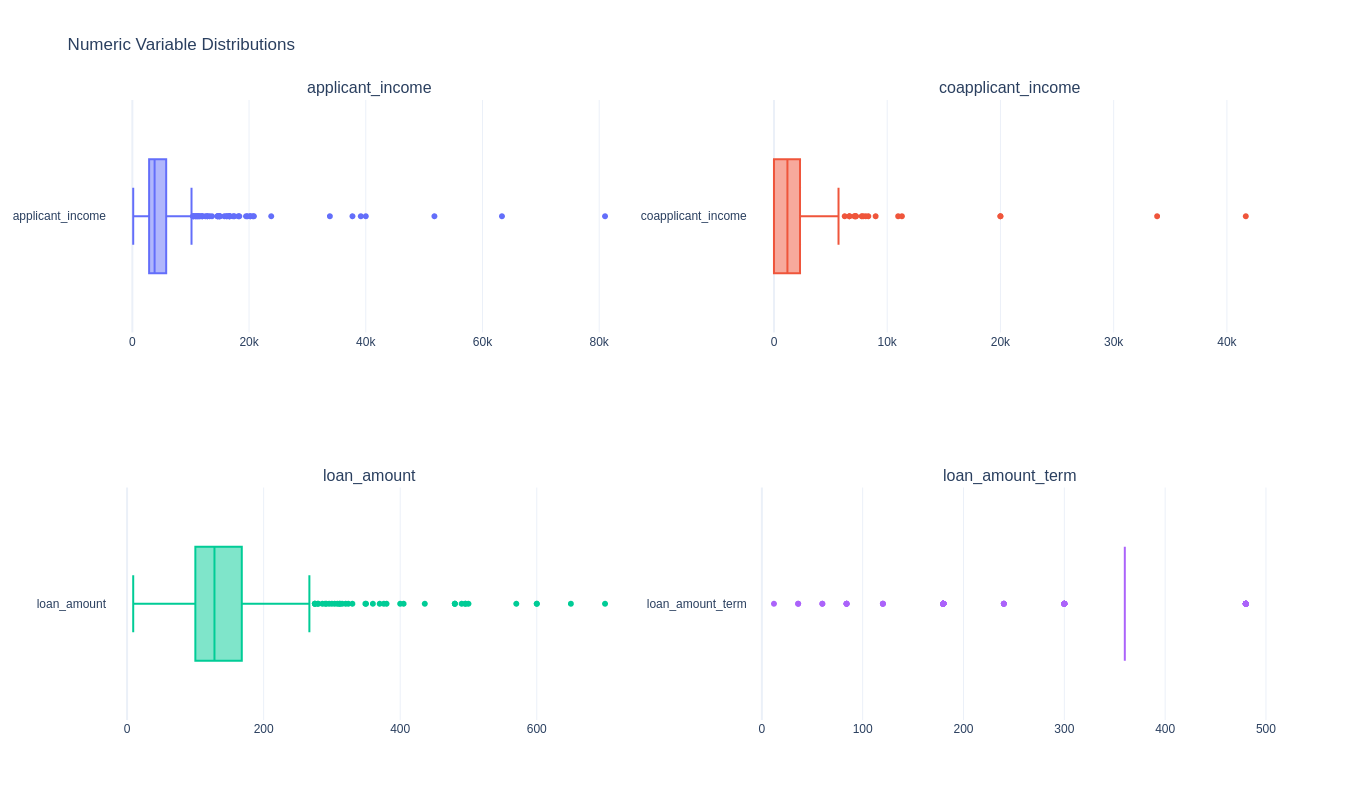

In [54]:
num_cols = 2
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=df_numeric.columns)

for i, column in enumerate(df_numeric.columns):
    row = i // num_cols + 1
    col = i % num_cols + 1
    fig.add_box(x=df_numeric[column],row=row, col=col, name=column)
    
fig.update_layout(
    title='Numeric Variable Distributions',
    height=800,
    showlegend=False,
    template='plotly_white'
)

fig.show()


In [55]:
df_numeric.corr()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term
applicant_income,1.000000,-0.116605,0.570909,-0.045306
coapplicant_income,-0.116605,1.000000,0.188619,-0.059878
loan_amount,0.570909,0.188619,1.000000,0.039447
loan_amount_term,-0.045306,-0.059878,0.039447,1.000000


There does exist a moderate correlation between `loan_amount` and `applicant_income` which will be examined

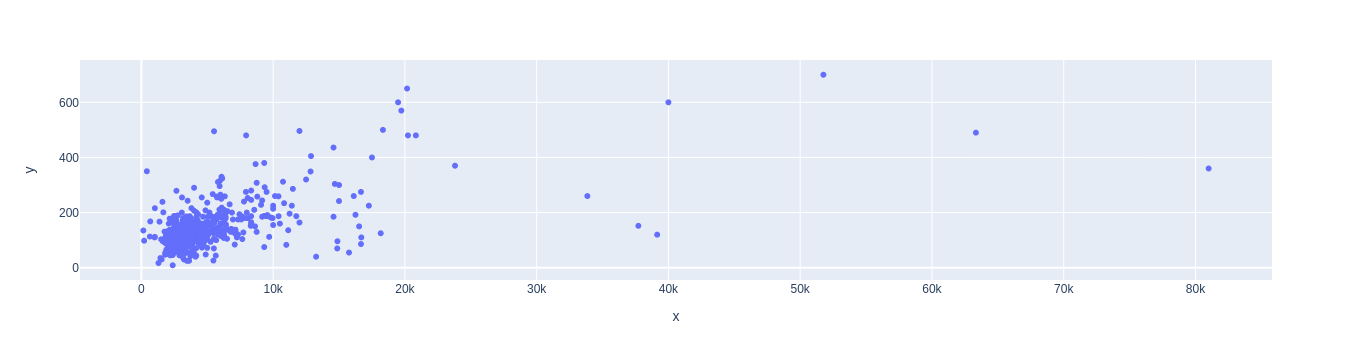

In [56]:
fig = px.scatter(x=df_numeric['applicant_income'], y=df_numeric['loan_amount'])
fig.show()

In [40]:
df = df[df['coapplicant_income'] < 6250]

In [41]:
import plotly.express as px

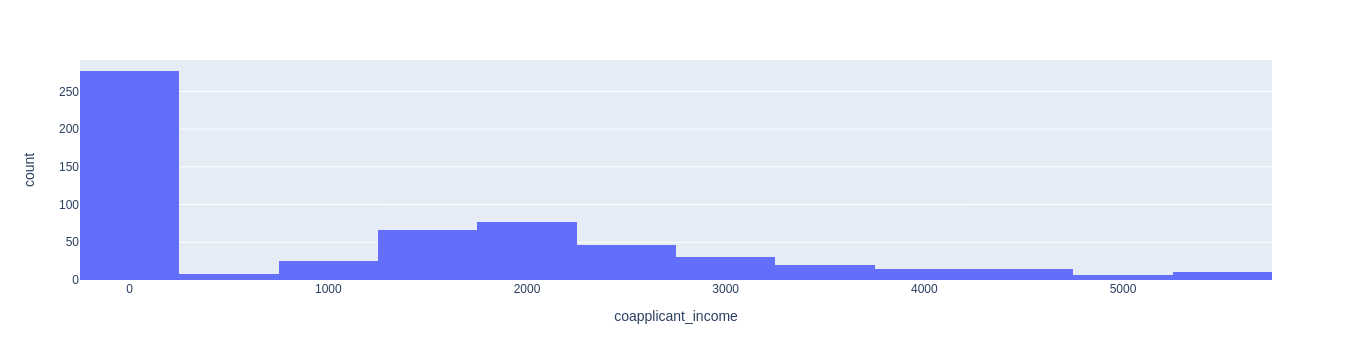

In [42]:
fig = px.histogram(data_frame=df, x='coapplicant_income')
fig